In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
url = 'https://raw.githubusercontent.com/ovlathkar/Random_Forest/refs/heads/main/Fraud_check.csv'
df = pd.read_csv(url)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df['Risk'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [4]:
print("Performing EDA")
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 Records:")
print(df.head())

print("\nClass Distribution:")
print(df['Risk'].value_counts())

Performing EDA

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Risk             600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB
None

First 5 Records:
  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264        

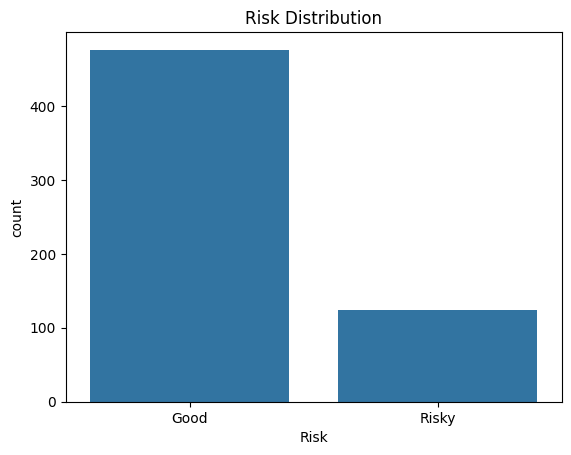

In [5]:
sns.countplot(data=df, x='Risk')
plt.title('Risk Distribution')
plt.show()

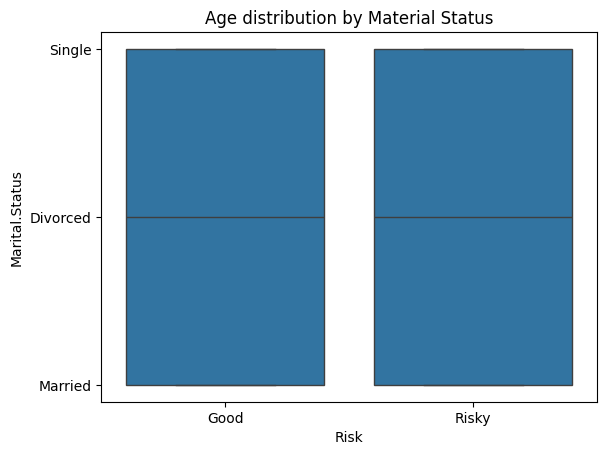

In [7]:
sns.boxplot(data=df, x='Risk', y='Marital.Status')
plt.title('Age distribution by Material Status')
plt.show()

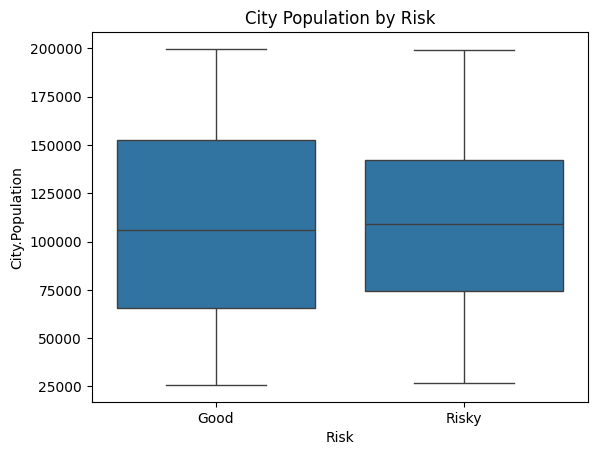

In [8]:
sns.boxplot(data=df, x='Risk', y='City.Population')
plt.title('City Population by Risk')
plt.show()

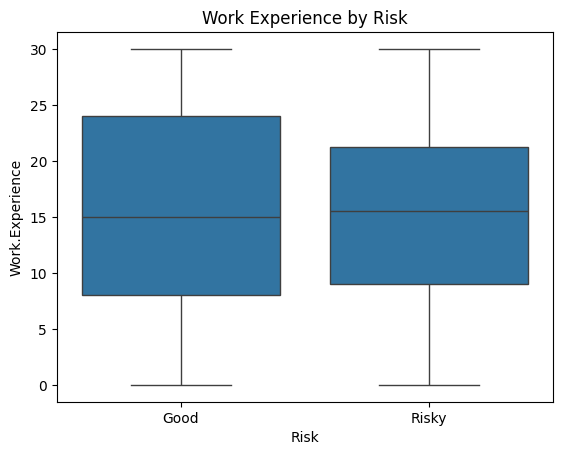

In [9]:
sns.boxplot(data=df, x='Risk', y='Work.Experience')
plt.title('Work Experience by Risk')
plt.show()

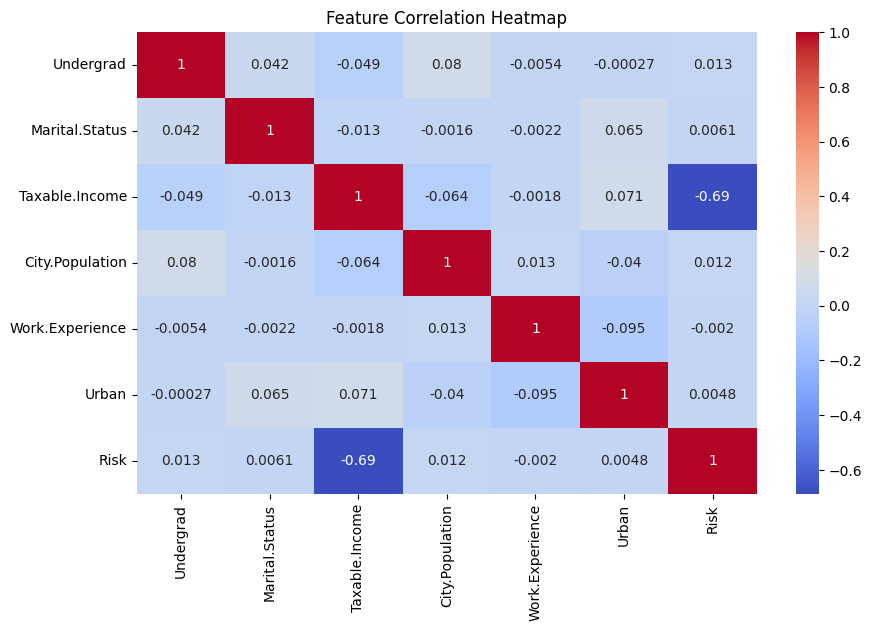

In [10]:
temp_df = df.copy()
label_enc = LabelEncoder()
for col in ['Undergrad', 'Marital.Status', 'Urban', 'Risk']:
    temp_df[col] = label_enc.fit_transform(temp_df[col])

plt.figure(figsize=(10,6))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
df.drop('Taxable.Income', axis=1, inplace=True)


In [12]:
label_enc = LabelEncoder()
for col in ['Undergrad', 'Marital.Status', 'Urban', 'Risk']:
    df[col] = label_enc.fit_transform(df[col])

In [13]:
X = df.drop('Risk', axis=1)
y = df['Risk']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0])

In [17]:

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


Confusion Matrix:
[[136   7]
 [ 37   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       143
           1       0.00      0.00      0.00        37

    accuracy                           0.76       180
   macro avg       0.39      0.48      0.43       180
weighted avg       0.62      0.76      0.68       180


Accuracy Score: 75.56 %


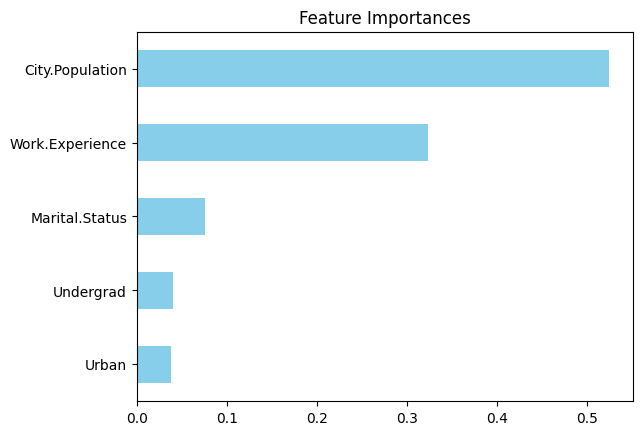

In [18]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importances")
plt.show()